In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":10,
    "n_white_vehicle":4,
    "n_white_drone":3},
    "init":"random"
  },

  "blacks":{
    "params":{
    "n_black_infantry":5,
    "n_black_vehicle":4,
    "n_black_drone":2},
    "init":"random"
  }
}

In [3]:
sim = Environment(config, shape=(50,50))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

QUEBEC        <plato.entity.infantry.Infantry object at 0x110298910>
COLORADO      <plato.entity.infantry.Infantry object at 0x10d9e7e90>
ROMEO         <plato.entity.infantry.Infantry object at 0x11037e710>
HURRICANE     <plato.entity.infantry.Infantry object at 0x110380210>
BUNKERHILL    <plato.entity.infantry.Infantry object at 0x110380cd0>
HIGGINS       <plato.entity.infantry.Infantry object at 0x11037f7d0>
ECHO          <plato.entity.infantry.Infantry object at 0x1103852d0>
FOXTROT       <plato.entity.infantry.Infantry object at 0x110385d90>
WICHITA       <plato.entity.infantry.Infantry object at 0x110387890>
MONSOON       <plato.entity.infantry.Infantry object at 0x110389390>
BRAVO         <plato.entity.vehicle.Vehicle object at 0x110389e50>
YANKEE        <plato.entity.vehicle.Vehicle object at 0x11038e510>
LIMA          <plato.entity.vehicle.Vehicle object at 0x11038d250>
MAHAN         <plato.entity.vehicle.Vehicle object at 0x10d5e4410>
BUFFALO       <plato.entity.drone.Drone ob

In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x110396c50>
unknown_1     <plato.entity.infantry.Infantry object at 0x110396c90>
unknown_2     <plato.entity.infantry.Infantry object at 0x110379790>
unknown_3     <plato.entity.infantry.Infantry object at 0x110398290>
unknown_4     <plato.entity.infantry.Infantry object at 0x110398d50>
unknown_5     <plato.entity.vehicle.Vehicle object at 0x11039c350>
unknown_6     <plato.entity.vehicle.Vehicle object at 0x11039ef90>
unknown_7     <plato.entity.vehicle.Vehicle object at 0x110397850>
unknown_8     <plato.entity.vehicle.Vehicle object at 0x11039c390>
unknown_9     <plato.entity.drone.Drone object at 0x10dae86d0>
unknown_10    <plato.entity.drone.Drone object at 0x1103a61d0>


In [7]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 50, 50)

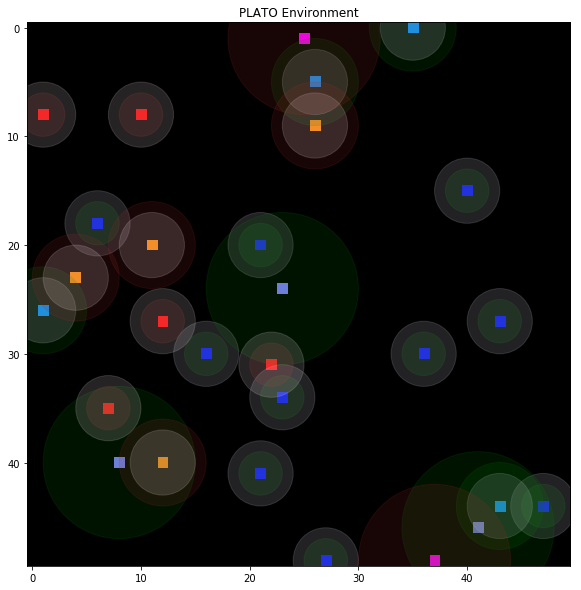

In [8]:
terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metdata = sim.step(whites, blacks)
    state = sprime
        
    sim.render()
    break

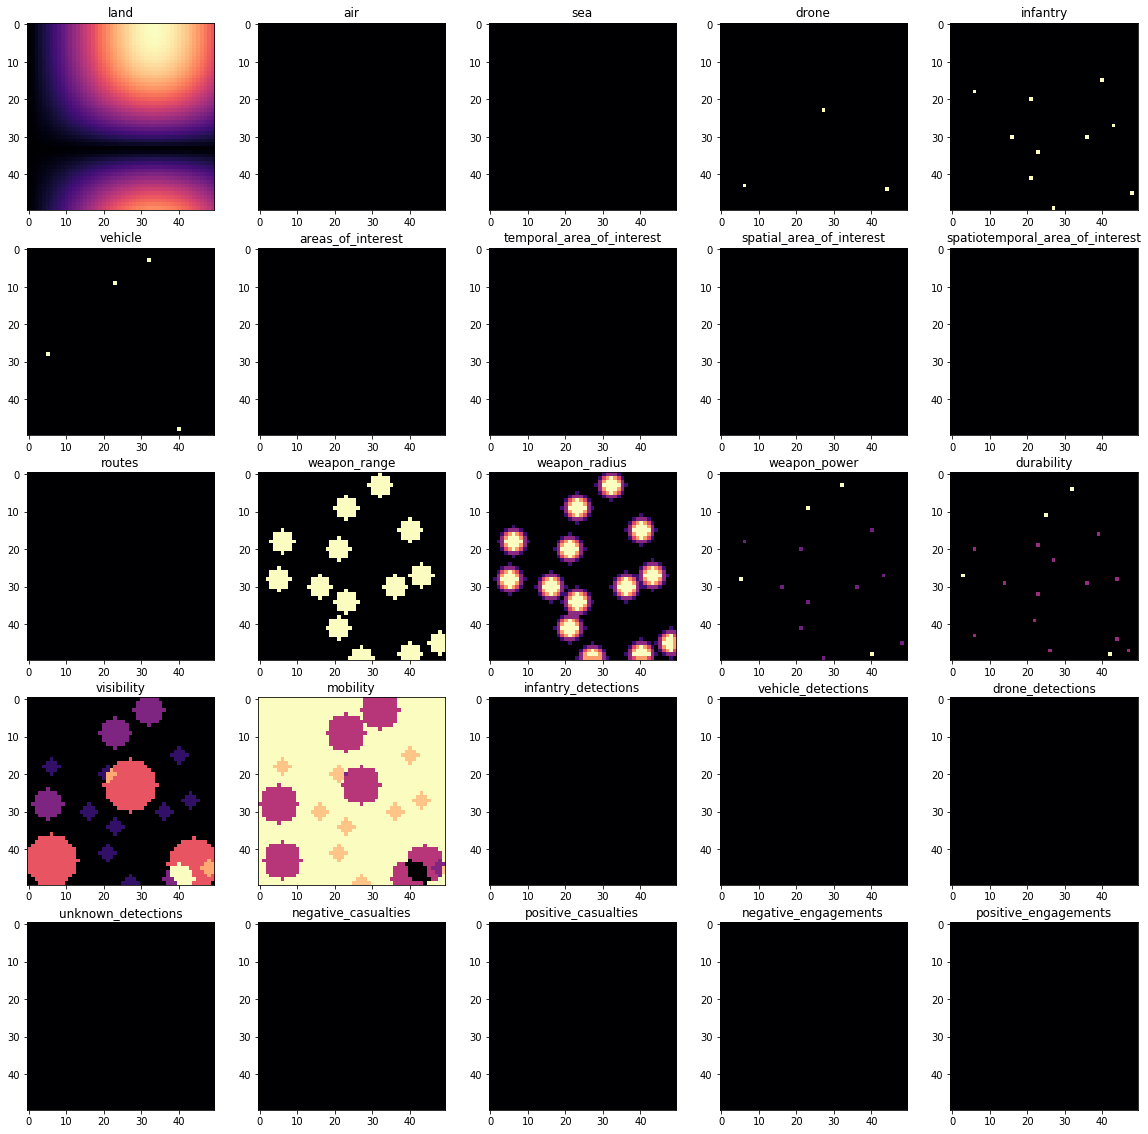

In [9]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

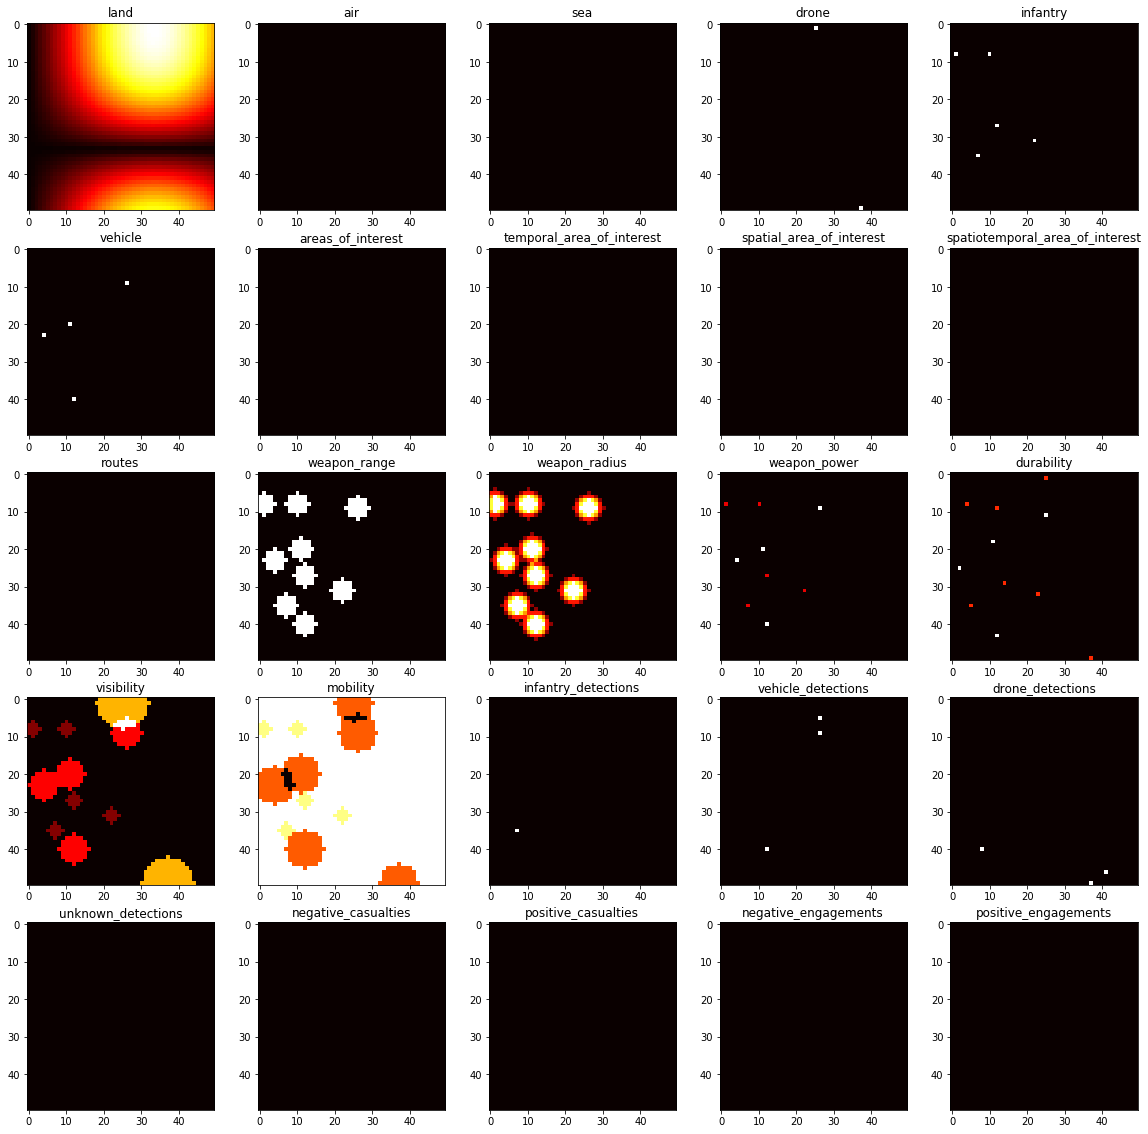

In [10]:
minimap = sim.observation(sim.blacks, negative=None)
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='hot')
mp.show()